# Harnessing the Power of Kolmogorov Arnould Network (KAN)

## Installing and Importing important libraries.

To try the network in Tensorflow, we will first install the tfkan library and later import it with other essential libraries.

In [1]:
!pip install tfkan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

## TensorFlow and Keras Code with Custom Layers (DenseKAN and Conv2DKAN)
This code snippet demonstrates how to import essential components for building a convolutional neural network using TensorFlow and Keras, along with custom layers (DenseKAN, Conv2DKAN) that might belong to an external library, `tfkan`.

- **TensorFlow and Keras** are being used to build and train deep learning models.
- **Numpy** is imported to handle array and matrix operations.
- **Matplotlib** is imported for visualizing data, typically for plotting training/validation losses or images.
- The custom `tfkan.layers` imports imply some custom layer types that expand on the basic Keras layers.

In [2]:
# Import TensorFlow for deep learning capabilities
import tensorflow as tf

# Import layers from Keras for building neural networks
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D

# Import custom layers from a hypothetical library 'tfkan'
# These layers are extensions of standard Dense and Conv2D,
# possibly with additional functionalities
from tfkan.layers import DenseKAN, Conv2DKAN

# Import NumPy for numerical operations, especially for handling arrays
import numpy as np

# Import Matplotlib for plotting and visualizing results
from matplotlib import pyplot as plt

# Loading and Preprocessing the Fashion-MNIST Dataset

In this code snippet, the Fashion-MNIST dataset is loaded and preprocessed for use in a convolutional neural network (CNN). The dataset consists of 70,000 grayscale images (28x28 pixels) across 10 different categories of clothing items. The training set contains 60,000 examples, while the test set includes 10,000 examples.

### Steps:
1. **Load the Fashion-MNIST dataset**: This is done using TensorFlow's built-in dataset loading function.
2. **Normalize the data**: The pixel values, originally between 0 and 255, are scaled to values between 0 and 1 by dividing by 255.0. This helps to speed up the training process.
3. **Expand dimensions**: Since CNN layers expect input data to have a certain shape, we add an extra dimension to indicate that the images are grayscale (1 channel).

In [3]:
# Load the Fashion-MNIST dataset from TensorFlow datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the image data to a range between 0 and 1 by dividing by 255
# Expand dimensions to add an extra channel for grayscale (axis=-1)
# Convert the data type to float32 for compatibility with most models
x_train = np.expand_dims(x_train / 255.0, axis=-1).astype(np.float32)
x_test = np.expand_dims(x_test / 255.0, axis=-1).astype(np.float32)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Print out the shape of the train dataset.
x_train.shape

(60000, 28, 28, 1)

# Building a Simple Convolutional Neural Network (CNN) for Fashion-MNIST Classification

This code snippet demonstrates how to build a simple Convolutional Neural Network (CNN) using the Keras API in TensorFlow to classify images from the Fashion-MNIST dataset. The network consists of two convolutional layers, followed by global average pooling, and finally a dense layer for classification.

### Model Overview:
1. **Conv2D Layers**: Extract features from the input image by applying filters to create feature maps.
2. **GlobalAveragePooling2D**: Reduces the spatial dimensions of each feature map to a single value (global average) before feeding into the final classification layer.
3. **Dense Layer with Softmax**: Classifies the image into one of 10 categories using the softmax activation function.

In [3]:
# Define a sequential model using Keras
mlp = tf.keras.models.Sequential([

    # First convolutional layer
    # - 32 filters (feature detectors) of size 5x5
    # - Stride of 2 means the filter will move 2 pixels at a time (reduces spatial dimensions faster)
    # - 'valid' padding implies no padding around the input image (so the output size reduces)
    # - ReLU activation function introduces non-linearity
    Conv2D(filters=32, kernel_size=5, strides=2, padding='valid', activation='relu'),

    # Second convolutional layer
    # - 64 filters of size 5x5
    # - Stride of 2, reducing spatial dimensions further
    # - 'valid' padding again reduces size without any added borders
    Conv2D(filters=64, kernel_size=5, strides=2, padding='valid', activation='relu'),

    # Global Average Pooling layer
    # - Reduces each feature map to a single number by averaging all values
    GlobalAveragePooling2D(),

    # Dense layer for classification
    # - 10 output units (for the 10 classes in Fashion-MNIST)
    # - Softmax activation to get class probabilities
    Dense(10, activation='softmax')
])

# Build the model by defining the input shape (28x28x1 for grayscale images)
mlp.build(input_shape=(None, 28, 28, 1))

# Print a summary of the model architecture
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          51264     
                                                                 
 global_average_pooling2d (  (None, 64)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 52746 (206.04 KB)
Trainable params: 52746 (206.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
%%time  # This is a magic command to measure the time taken to execute the cell

# Compile the model
# - Optimizer: Adam optimizer with a learning rate of 1e-3 (0.001)
# - Loss: Sparse categorical cross-entropy (used for integer-labeled multi-class classification)
# - Metrics: Accuracy to monitor the model's performance during training
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
# - Epochs: 10 (number of passes through the training data)
# - Batch size: 128 (number of samples processed before updating the model parameters)
# - Validation data: Use the test set to evaluate the model's performance at the end of each epoch
# - Verbose=1: Print progress during training
mlp_history = mlp.fit(x_train, y_train,
                      epochs=10,
                      batch_size=128,
                      validation_data=(x_test, y_test),
                      verbose=1)

Epoch 1/10
469/469 [==============================] - 27s 54ms/step - loss: 0.9348 - accuracy: 0.6695 - val_loss: 0.7195 - val_accuracy: 0.7412
Epoch 2/10
469/469 [==============================] - 14s 31ms/step - loss: 0.6599 - accuracy: 0.7597 - val_loss: 0.6346 - val_accuracy: 0.7726
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.5843 - accuracy: 0.7894 - val_loss: 0.5765 - val_accuracy: 0.7969
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.5401 - accuracy: 0.8067 - val_loss: 0.5418 - val_accuracy: 0.8062
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 0.5089 - accuracy: 0.8192 - val_loss: 0.5200 - val_accuracy: 0.8155
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.4832 - accuracy: 0.8271 - val_loss: 0.4929 - val_accuracy: 0.8259
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.4636 - accuracy: 0.8359 - val_loss: 0.4769 - val_accuracy:

# Building a Kolmogorov-Arnold Network (KAN) for Fashion-MNIST Classification

This code constructs a Kolmogorov-Arnold Network (KAN) model for classifying Fashion-MNIST images. In this context, the KAN architecture uses the Kolmogorov-Arnold representation theorem to approximate multivariate functions, implemented through layers like `Conv2DKAN` and `DenseKAN`, which may focus on decomposing the function into simpler parts.

In [5]:
# Define a sequential KAN model
kan = tf.keras.models.Sequential([

    # First Conv2DKAN layer:
    # - 8 filters with a kernel size of 5x5
    # - Stride of 2 to reduce spatial resolution by half
    # - 'valid' padding indicates no padding around the input
    # - 'kan_kwargs' specifies the grid size for decomposition (custom KAN behavior)
    Conv2DKAN(filters=8, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),

    # Layer normalization to stabilize the training by normalizing the activations
    tf.keras.layers.LayerNormalization(),

    # Second Conv2DKAN layer:
    # - 16 filters with a kernel size of 5x5
    # - Stride of 2 for further spatial downsampling
    Conv2DKAN(filters=16, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),

    # Global Average Pooling to reduce each feature map to a single value
    GlobalAveragePooling2D(),

    # DenseKAN layer:
    # - Fully connected layer using Kolmogorov-Arnold decomposition (grid size = 3)
    # - Output layer with 10 units, one for each class in the Fashion-MNIST dataset
    DenseKAN(10, grid_size=3),

    # Softmax activation for converting logits into class probabilities
    tf.keras.layers.Softmax()
])

# Build the KAN model specifying the input shape (28x28x1 for grayscale images)
kan.build(input_shape=(None, 28, 28, 1))

# Print a summary of the KAN model architecture
kan.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2dkan (Conv2DKAN)       (None, 12, 12, 8)         1658      
                                                                 
 layer_normalization (Layer  (None, 12, 12, 8)         16        
 Normalization)                                                  
                                                                 
 conv2dkan_1 (Conv2DKAN)     (None, 4, 4, 16)          24416     
                                                                 
 global_average_pooling2d_1  (None, 16)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_kan (DenseKAN)        (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)               

In [6]:
%%time
# Compile the KAN model
# - Optimizer: Adam optimizer with a learning rate of 0.001 (1e-3)
# - Loss: Sparse categorical cross-entropy (since the labels are integer-encoded)
# - Metrics: Track accuracy to evaluate performance during training
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the KAN model
# - Epochs: 10 (the number of complete passes through the training data)
# - Batch size: 128 (the number of samples to process before updating the model)
# - Validation data: Evaluate the model on the test set after each epoch to track its generalization ability
# - Verbose=1: Print progress and results for each epoch
kan_history = kan.fit(x_train, y_train,
                      epochs=10,
                      batch_size=128,
                      validation_data=(x_test, y_test),
                      verbose=1)

Epoch 1/10
469/469 [==============================] - 435s 920ms/step - loss: 1.1020 - accuracy: 0.6106 - val_loss: 0.7332 - val_accuracy: 0.7341
Epoch 2/10
469/469 [==============================] - 414s 882ms/step - loss: 0.6643 - accuracy: 0.7557 - val_loss: 0.6318 - val_accuracy: 0.7708
Epoch 3/10
469/469 [==============================] - 428s 912ms/step - loss: 0.5848 - accuracy: 0.7873 - val_loss: 0.5739 - val_accuracy: 0.7923
Epoch 4/10
469/469 [==============================] - 423s 902ms/step - loss: 0.5366 - accuracy: 0.8052 - val_loss: 0.5391 - val_accuracy: 0.8067
Epoch 5/10
469/469 [==============================] - 414s 884ms/step - loss: 0.5058 - accuracy: 0.8174 - val_loss: 0.5350 - val_accuracy: 0.8077
Epoch 6/10
469/469 [==============================] - 432s 922ms/step - loss: 0.4835 - accuracy: 0.8247 - val_loss: 0.5019 - val_accuracy: 0.8194
Epoch 7/10
469/469 [==============================] - 411s 876ms/step - loss: 0.4669 - accuracy: 0.8314 - val_loss: 0.4923 -

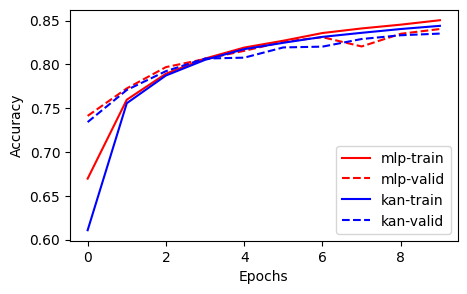

In [7]:
# Create a figure with a custom size (5x3 inches)
fig = plt.figure(figsize=(5, 3))

# Plot the MLP model's training accuracy
# - 'mlp_history.history['accuracy']' contains the training accuracy at each epoch
# - 'label' sets the label for the line in the legend
# - 'ls' defines the line style: solid line for training data
# - 'color' sets the color of the line to red
plt.plot(mlp_history.history['accuracy'], label='mlp-train', ls="-", color="red")

# Plot the MLP model's validation accuracy
# - 'mlp_history.history['val_accuracy']' contains the validation accuracy
# - Dashed line for validation data
plt.plot(mlp_history.history['val_accuracy'], label='mlp-valid', ls="--", color="red")

# Plot the KAN model's training accuracy
# - Blue color is used to distinguish from MLP
plt.plot(kan_history.history['accuracy'], label='kan-train', ls="-", color="blue")

# Plot the KAN model's validation accuracy
# - Dashed blue line for validation data
plt.plot(kan_history.history['val_accuracy'], label='kan-valid', ls="--", color="blue")

# Set the x-axis label to 'Epochs'
plt.xlabel("Epochs")

# Set the y-axis label to 'Accuracy'
plt.ylabel("Accuracy")

# Display the legend to identify the plotted lines
plt.legend()

# Show the plot
plt.show()

## Phase one Insights

### From the above experiment the following observations can be seen:
1. AS it can be seen from the curve, the KANs model learns parameters very easily and does so with less number of parameters as compared to MLP
2. As the dataset is too high, MLP is performing better because it can adjust to the complexities better than KANs model. However, KANs have a comparable learning curve as well, which can only mean that for smaller models, much like MobileNet, we can substitute the solution with a KAN model which will be less parametric and less memory.